In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [25]:
#Create random lat and long combos
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [26]:
coordinates = list(lat_lngs)

In [27]:
# Use the tuple() function to display the latitude and longitude combinations.
#Create list for holding cities
cities = []

#Identify nearest city for each lat and long combo
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, add it to the city list
    if city not in cities:
        cities.append(city)
        
#Print city count to confirm there are enough cities
len(cities)

617

In [28]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [29]:
# Starting URL for Weather Map API Call.
#If you click the link below the cell once running this cell
#then a 404 error will be thrown because there is no city data
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [30]:
#Let's create some city data and run it again
#Create an endpoint URL for a city.
#make sure to add JSONView extension to read it as JSON
city_url = url + "&q=" + "Boston"

In [31]:
# Make a 'Get' request for the city weather.
#200 is a valid response, 404 would be an error
#city_weather = requests.get(city_url)
#city_weather

In [32]:
# Get the text of the 'Get' request.
#city_weather.text

In [33]:
# Get the JSON text of the 'Get' request.
#city_weather.json()

In [34]:
#Let's create a conditional to ensure each city has a valid 200 response
#city_url = url + "&q=" + "Boston"
#city_weather = requests.get(city_url)

#if city_weather.status_code == 200:
    #print(f"City weather found.")
#else:
    #print(f"City weather not found.")
    

In [35]:
#city_url = url + "&q=" + "Boston"
#cit_weather = requests.get(city_url)
#city_weather.json()

In [36]:
#boston_data = city_weather.json()

In [37]:
#boston_data["sys"]

In [38]:
#boston_data["sys"]["country"]

In [39]:
#boston_data["dt"]

In [40]:
#lat = boston_data["coord"]["lat"]
#lng = boston_data["coord"]["lon"]
#max_temp = boston_data["main"]["temp_max"]
#humidity = boston_data["main"]["humidity"]
#clouds = boston_data["clouds"]["all"]
#wind = boston_data["wind"]["speed"]
#print(lat,lng,max_temp,humidity,clouds,wind)

In [41]:
#Let's practice changing the date-time format
from datetime import datetime
import time

#date=boston_data["dt"]
#datetime.utcfromtimestamp(date).strftime("%Y-%m-%d %H:%M:%S")

In [42]:
#End of Practice, let's get started
city_data = []
#Print the beginning of logging
print("Beginning Data Retrieval   ")
print("---------------------------")

#Create counters. We need to create counters because the free version of
#OpenWeatherMap API only allows for 60 calls per minute
#We will ahve to command the program to pause between calls for a minute
record_count = 1
set_count = 1

#Loop thru cities in our list
#enumerate is used so that we can retrieve city data instead of the index
for i, city in enumerate(cities):
    
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    city_url = url + "&q=" + city.replace(" ","+")
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval   
---------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | dunedin
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | manta
Processing Record 5 of Set 1 | barrow
Processing Record 6 of Set 1 | moron
Processing Record 7 of Set 1 | korbach
Processing Record 8 of Set 1 | arraial do cabo
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | east london
Processing Record 11 of Set 1 | katsiveli
City not found. Skipping...
Processing Record 12 of Set 1 | aykhal
Processing Record 13 of Set 1 | lebu
Processing Record 14 of Set 1 | valparaiso
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | grootfontein
Processing Record 17 of Set 1 | tasiilaq
Processing Record 18 of Set 1 | archidona
Processing Record 19 of Set 1 | andenes
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | hobart
Processing Record 22 of Set 1 | sidi ali
Processing Record 23 of S

Processing Record 37 of Set 4 | vila velha
Processing Record 38 of Set 4 | talnakh
Processing Record 39 of Set 4 | bud
Processing Record 40 of Set 4 | la paz
Processing Record 41 of Set 4 | deputatskiy
Processing Record 42 of Set 4 | samana
Processing Record 43 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 44 of Set 4 | mount gambier
Processing Record 45 of Set 4 | kaeo
Processing Record 46 of Set 4 | new norfolk
Processing Record 47 of Set 4 | klaksvik
Processing Record 48 of Set 4 | thilogne
City not found. Skipping...
Processing Record 49 of Set 4 | dicabisagan
Processing Record 50 of Set 4 | mindelo
Processing Record 1 of Set 5 | sao filipe
Processing Record 2 of Set 5 | chake chake
Processing Record 3 of Set 5 | poum
Processing Record 4 of Set 5 | thompson
Processing Record 5 of Set 5 | krasnoyarsk-66
City not found. Skipping...
Processing Record 6 of Set 5 | lompoc
Processing Record 7 of Set 5 | posevnaya
Processing Record 8 of Set 5 | muswellbrook
Processi

Processing Record 22 of Set 8 | luderitz
Processing Record 23 of Set 8 | tazovskiy
Processing Record 24 of Set 8 | skibbereen
Processing Record 25 of Set 8 | toliary
City not found. Skipping...
Processing Record 26 of Set 8 | lagoa
Processing Record 27 of Set 8 | marzuq
Processing Record 28 of Set 8 | lieksa
Processing Record 29 of Set 8 | ponta delgada
Processing Record 30 of Set 8 | nome
Processing Record 31 of Set 8 | dikson
Processing Record 32 of Set 8 | bodden town
Processing Record 33 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 34 of Set 8 | pucallpa
Processing Record 35 of Set 8 | okahandja
Processing Record 36 of Set 8 | alexandria
Processing Record 37 of Set 8 | lixourion
Processing Record 38 of Set 8 | kostrzyn
Processing Record 39 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 40 of Set 8 | sabzevar
Processing Record 41 of Set 8 | satitoa
City not found. Skipping...
Processing Record 42 of Set 8 | srednekolymsk
Processing Record 

Processing Record 8 of Set 12 | conakry
Processing Record 9 of Set 12 | los llanos de aridane
Processing Record 10 of Set 12 | nisia floresta
Processing Record 11 of Set 12 | teguise
Processing Record 12 of Set 12 | loreto
Processing Record 13 of Set 12 | beira
Processing Record 14 of Set 12 | vanavara
Processing Record 15 of Set 12 | ruatoria
City not found. Skipping...
Processing Record 16 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 17 of Set 12 | slave lake
Processing Record 18 of Set 12 | borazjan
Processing Record 19 of Set 12 | cadolzburg
Processing Record 20 of Set 12 | livny
Processing Record 21 of Set 12 | camacha
Processing Record 22 of Set 12 | russell
Processing Record 23 of Set 12 | samarinda
Processing Record 24 of Set 12 | marsh harbour
Processing Record 25 of Set 12 | leninskoye
Processing Record 26 of Set 12 | nalut
Processing Record 27 of Set 12 | acari
Processing Record 28 of Set 12 | prince rupert
Processing Record 29 of Set 12 | palabuhanr

In [43]:
len(city_data)

557

In [44]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tiksi,71.6872,128.8694,-7.38,100,100,2.82,RU,2022-01-24 04:31:21
1,Dunedin,-45.8742,170.5036,58.80,93,84,8.01,NZ,2022-01-24 04:31:21
2,Atuona,-9.8000,-139.0333,78.67,74,11,17.72,PF,2022-01-24 04:31:22
3,Manta,-0.9500,-80.7333,78.58,89,100,4.61,EC,2022-01-24 04:31:22
4,Barrow,71.2906,-156.7887,-0.38,71,40,8.05,US,2022-01-24 04:31:23
5,Moron,-34.6534,-58.6198,73.98,94,92,4.52,AR,2022-01-24 04:31:23
6,Korbach,51.2756,8.8730,36.88,96,17,1.99,DE,2022-01-24 04:31:24
7,Arraial Do Cabo,-22.9661,-42.0278,74.70,88,7,20.36,BR,2022-01-24 04:31:24
8,Jamestown,42.0970,-79.2353,14.72,92,100,0.00,US,2022-01-24 04:31:06
9,East London,-33.0153,27.9116,70.74,83,0,6.91,ZA,2022-01-24 04:31:25


In [45]:
new_column_order = ["City","Country","Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tiksi,RU,2022-01-24 04:31:21,71.6872,128.8694,-7.38,100,100,2.82
1,Dunedin,NZ,2022-01-24 04:31:21,-45.8742,170.5036,58.80,93,84,8.01
2,Atuona,PF,2022-01-24 04:31:22,-9.8000,-139.0333,78.67,74,11,17.72
3,Manta,EC,2022-01-24 04:31:22,-0.9500,-80.7333,78.58,89,100,4.61
4,Barrow,US,2022-01-24 04:31:23,71.2906,-156.7887,-0.38,71,40,8.05
...,...,...,...,...,...,...,...,...,...
552,Khani,GE,2022-01-24 04:47:49,41.9563,42.9566,35.17,82,80,5.01
553,Sakete,BJ,2022-01-24 04:47:49,6.7362,2.6587,74.34,82,2,3.40
554,Huaicheng,CN,2022-01-24 04:47:50,23.9051,112.1931,61.83,66,99,4.21
555,Zapolyarnyy,RU,2022-01-24 04:47:50,69.4154,30.8136,38.48,84,100,36.13


In [23]:
# Create the output file (CSV).
output_data_file = "Resources/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [46]:
# Extract relevant fields from the dataframe for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [47]:
#Need to get time info for scatter plot, so we will use the time module that is standard with python
import time
#Get today's date in seconds
today = time.time()
today

1643071754.9878273

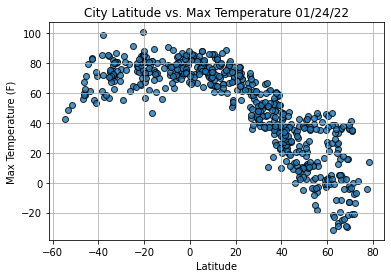

In [52]:
#Build latitude vs. max temp
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.grid(True)

#Save figure
plt.savefig("Resources/Fig1.png")

#Show plot.
plt.show()

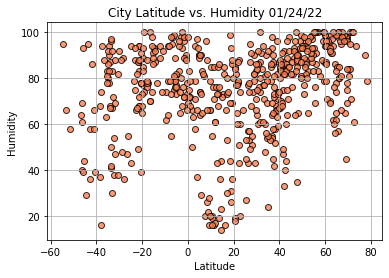

In [53]:
#Build latitude vs. max temp
plt.scatter(lats,
           humidity,
           color="coral",edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.grid(True)

#Save figure
plt.savefig("Resources/Fig2.png")

#Show plot.

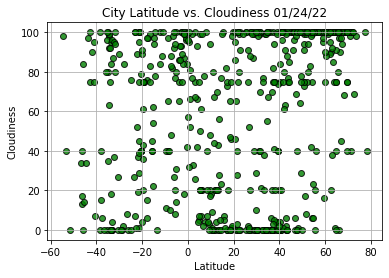

In [54]:
#Build latitude vs. max temp
plt.scatter(lats,
           cloudiness,
           color="green",edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.grid(True)

#Save figure
plt.savefig("Resources/Fig3.png")

#Show plot.

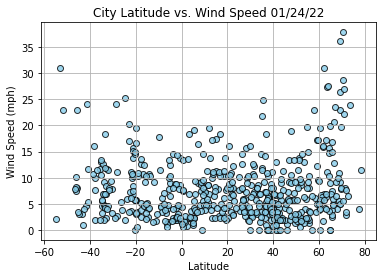

In [55]:
#Build latitude vs. max temp
plt.scatter(lats,
           wind_speed,
           color="skyblue",edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.grid(True)

#Save figure
plt.savefig("Resources/Fig4.png")

#Show plot.